In [73]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px 
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [126]:
df= pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')

In [128]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [76]:
df.shape

(10324, 33)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [78]:
df = df.drop('ID', axis=1)

In [79]:
df.isna().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
M

In [80]:
df.isna().mean()

Project Code                    0.000000
PQ #                            0.000000
PO / SO #                       0.000000
ASN/DN #                        0.000000
Country                         0.000000
Managed By                      0.000000
Fulfill Via                     0.000000
Vendor INCO Term                0.000000
Shipment Mode                   0.034870
PQ First Sent to Client Date    0.000000
PO Sent to Vendor Date          0.000000
Scheduled Delivery Date         0.000000
Delivered to Client Date        0.000000
Delivery Recorded Date          0.000000
Product Group                   0.000000
Sub Classification              0.000000
Vendor                          0.000000
Item Description                0.000000
Molecule/Test Type              0.000000
Brand                           0.000000
Dosage                          0.168152
Dosage Form                     0.000000
Unit of Measure (Per Pack)      0.000000
Line Item Quantity              0.000000
Line Item Value 

In [81]:
missing_rows = df[df['Shipment Mode'].isna()].index
df = df.drop(missing_rows, axis=0).reset_index(drop=True)

In [82]:
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

In [83]:
df.isna().sum()

Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

In [84]:
df.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [85]:
df.nunique()

Project Code                     142
PQ #                            1237
PO / SO #                       6013
ASN/DN #                        6804
Country                           43
Managed By                         4
Fulfill Via                        2
Vendor INCO Term                   8
Shipment Mode                      4
PQ First Sent to Client Date     765
PO Sent to Vendor Date           893
Scheduled Delivery Date         1952
Delivered to Client Date        2040
Delivery Recorded Date          1990
Product Group                      5
Sub Classification                 6
Vendor                            72
Item Description                 183
Molecule/Test Type                85
Brand                             47
Dosage                            54
Dosage Form                       17
Unit of Measure (Per Pack)        31
Line Item Quantity              4938
Line Item Value                 8463
Pack Price                      1130
Unit Price                       179
M

In [86]:
data_feature=[ 'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date']

In [87]:
for column in data_feature:
   print(column,pd.to_datetime(df[column],errors='coerce').isna().mean())

PQ First Sent to Client Date 0.23293857888398234
PO Sent to Vendor Date 0.5436571657968687
Scheduled Delivery Date 0.0
Delivered to Client Date 0.0
Delivery Recorded Date 0.0


In [88]:
#dropping the dates
df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis=1)

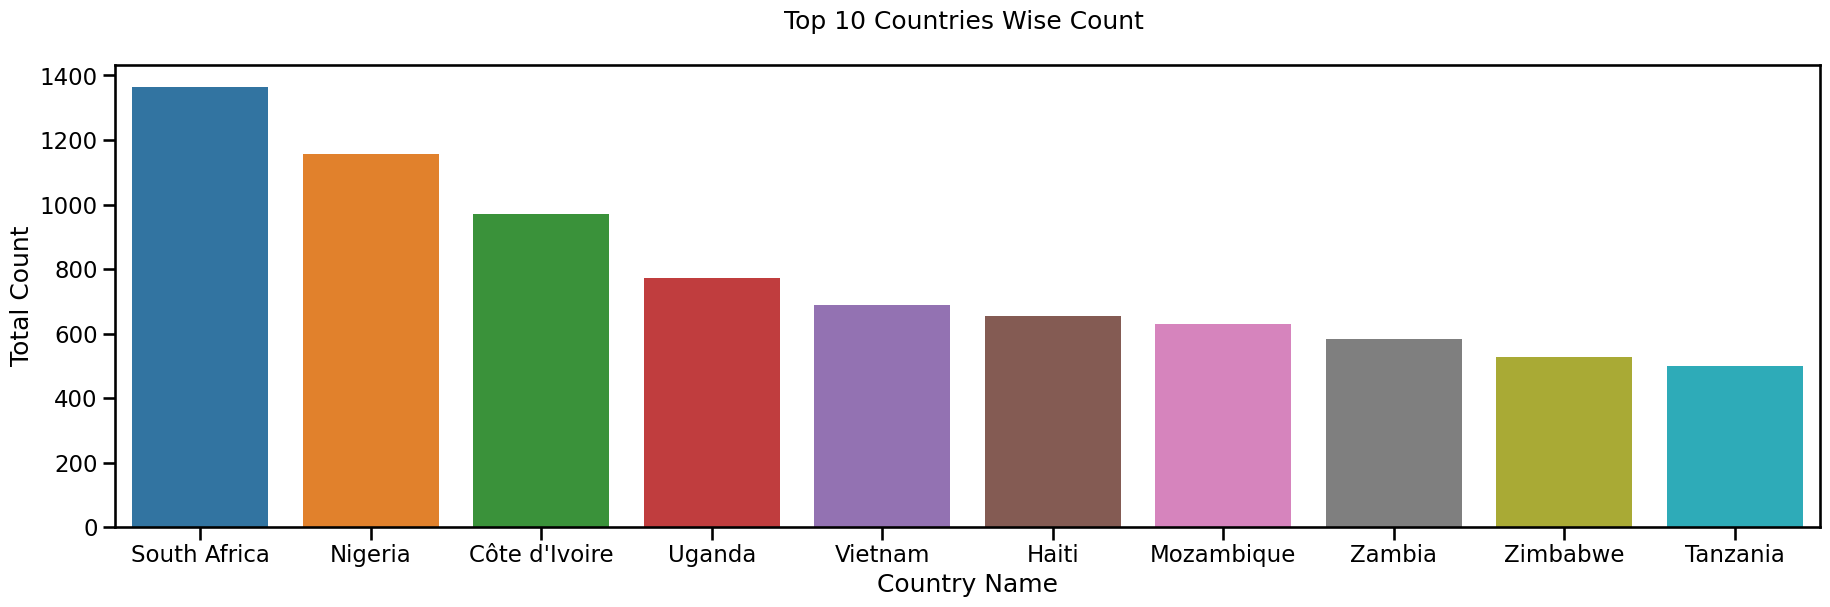

In [89]:
DataSet = df
ItemCount = DataSet["Country"].value_counts().nlargest(10)
plt.figure(figsize=(22,6))
sns.set_context("talk",font_scale=1)
sns.countplot(x='Country', data=DataSet, order=ItemCount.index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name') 
plt.show()

In [90]:
import plotly.graph_objects as go
import plotly.io as py
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.show(fig, filename="Shipment Mode")

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1694
Mylan (formerly Matrix) Nashik     695
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       417
Trinity Biotech, Plc               383
Inverness Japan                    320
ABBVIE Ludwigshafen Germany        285
Cipla, Goa, India                  274
Strides, Bangalore, India.         256
ABBVIE (Abbott) Logis. UK          150
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

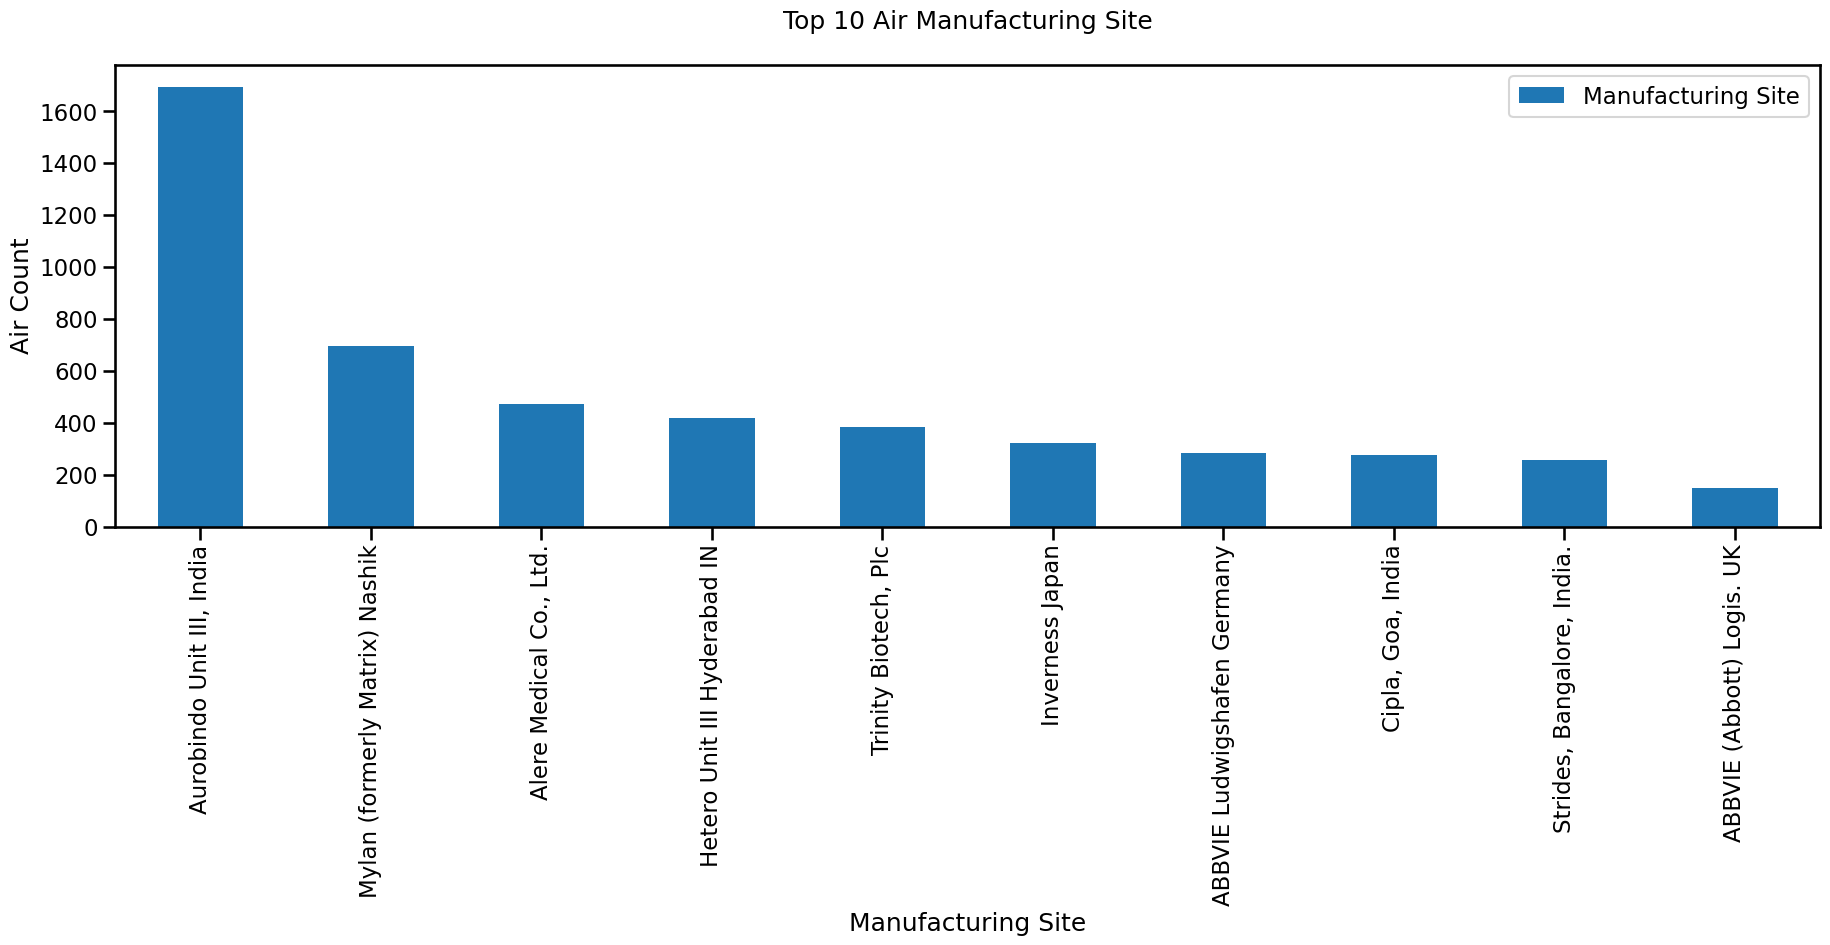

In [91]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

In [92]:
for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + ' Year'] = df[column].apply(lambda x: x.year)
        df[column + ' Month'] = df[column].apply(lambda x: x.month)
        df[column + ' Day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)

In [93]:
df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,...,241.243885,2006,6,2,2006,6,2,2006,6,2
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,2006,11,14,2006,11,14,2006,11,14
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,...,241.243885,2006,8,27,2006,8,27,2006,8,27
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,2006,9,1,2006,9,1,2006,9,1
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,2006,8,11,2006,8,11,2006,8,11


In [94]:
for column in ['Weight (Kilograms)','Freight Cost (USD)']:
  print(df[column].apply(lambda x:np.NaN if not x.isnumeric() else x).isna().mean())

0.3818747490967483
0.9614612605379366


In [95]:
df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)


In [96]:
df.shape

(9964, 34)

In [97]:
df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)

In [98]:
# Binary encoding
df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
df['First Line Designation'] = df['First Line Designation'].replace({'No': 0, 'Yes': 1})

In [99]:
# One-hot encoding
for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    

In [100]:
    
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}

In [101]:
 # Split df into X and y
y = df['Shipment Mode']
X = df.drop('Shipment Mode', axis=1)
    
# Encode the labels
y = y.replace(LABEL_MAPPING)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)




In [102]:
y_train.value_counts()

0    4317
1    1950
2     449
3     258
Name: Shipment Mode, dtype: int64

In [103]:
X_train.shape

(6974, 771)

In [104]:
inputs = tf.keras.Input(shape=(771,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
175/175 [==============================] - 2s 5ms/step - loss: 0.4622 - accuracy: 0.8274 - val_loss: 0.3145 - val_accuracy: 0.8832
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2387 - accuracy: 0.9030 - val_loss: 0.2907 - val_accuracy: 0.8803
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2001 - accuracy: 0.9115 - val_loss: 0.2968 - val_accuracy: 0.8767
Epoch 4/100
175/175 [==============================] - 1s 3ms/step - loss: 0.1862 - accuracy: 0.9202 - val_loss: 0.3074 - val_accuracy: 0.8839
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1721 - accuracy: 0.9242 - val_loss: 0.2931 - val_accuracy: 0.8832


94/94 [==============================] - 0s 2ms/step
Test Set Accuracy: 88.33%


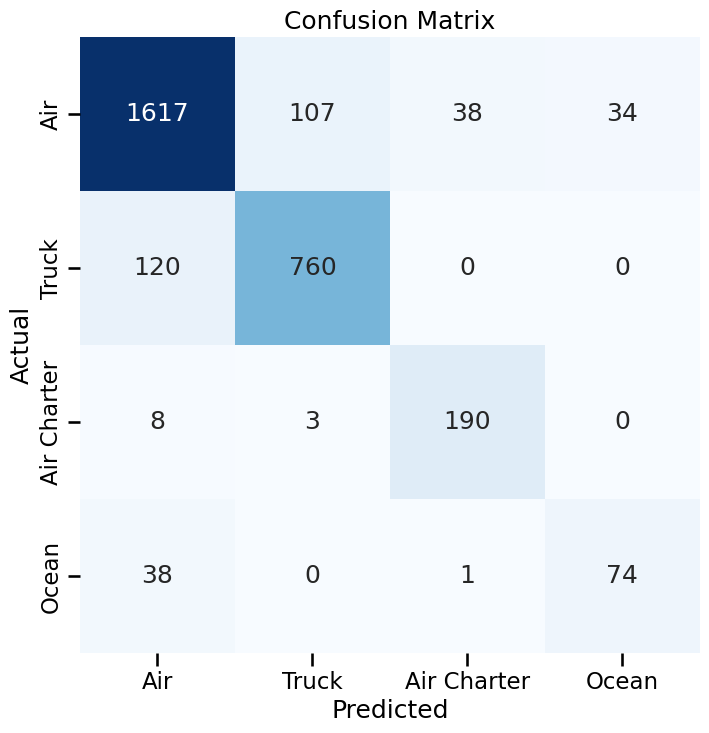

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.91      0.90      0.90      1796
       Truck       0.87      0.86      0.87       880
 Air Charter       0.83      0.95      0.88       201
       Ocean       0.69      0.65      0.67       113

    accuracy                           0.88      2990
   macro avg       0.82      0.84      0.83      2990
weighted avg       0.88      0.88      0.88      2990



In [106]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


Predict the arrival 

In [107]:
df2=pd.read_csv('/content/data2.csv')

In [108]:
df2.shape

(10999, 12)

In [109]:
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [110]:
df2.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [111]:
df2.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [112]:
transport = df2["Mode_of_Shipment"].value_counts().reset_index() 
transport.columns = ["Mode","Values"] 
fig = px.pie(transport,names='Mode',values='Values',color_discrete_sequence=px.colors.sequential.Magenta_r) 
fig.update_traces(textinfo='percent+label')

In [113]:
product = df2['Product_importance'].value_counts().reset_index() 
product.columns = ['Importance','Values'] 
fig = px.pie(product,names='Importance',values='Values',color_discrete_sequence=px.colors.sequential.Emrld_r) 
fig.update_traces(textinfo='percent+label')


<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

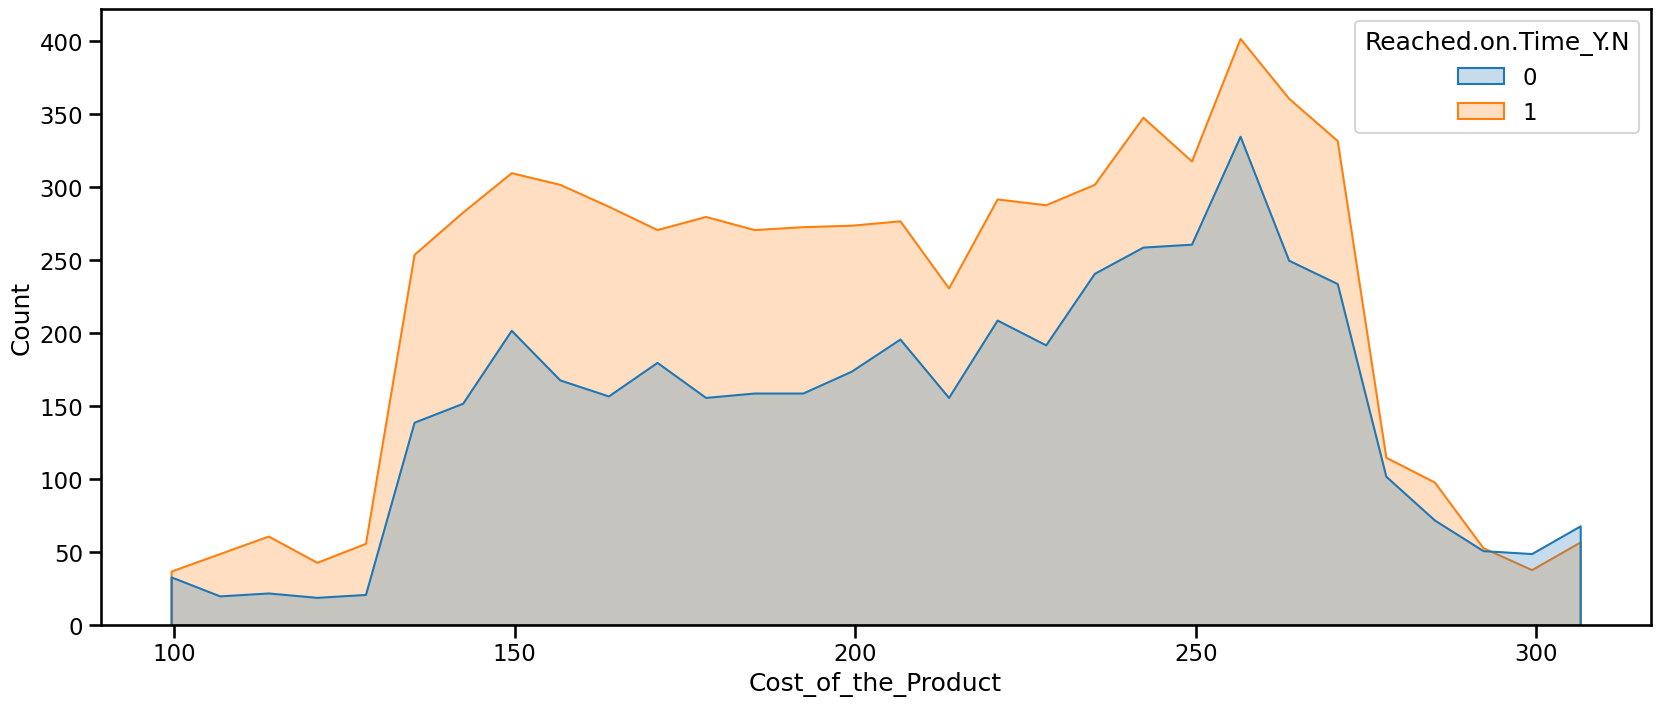

In [114]:
#At what range of cost of product reaches on delivery time

plt.figure(figsize=(20,8))
sns.histplot(df2,x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="poly",color="g")

<Axes: xlabel='Weight_in_gms', ylabel='Count'>

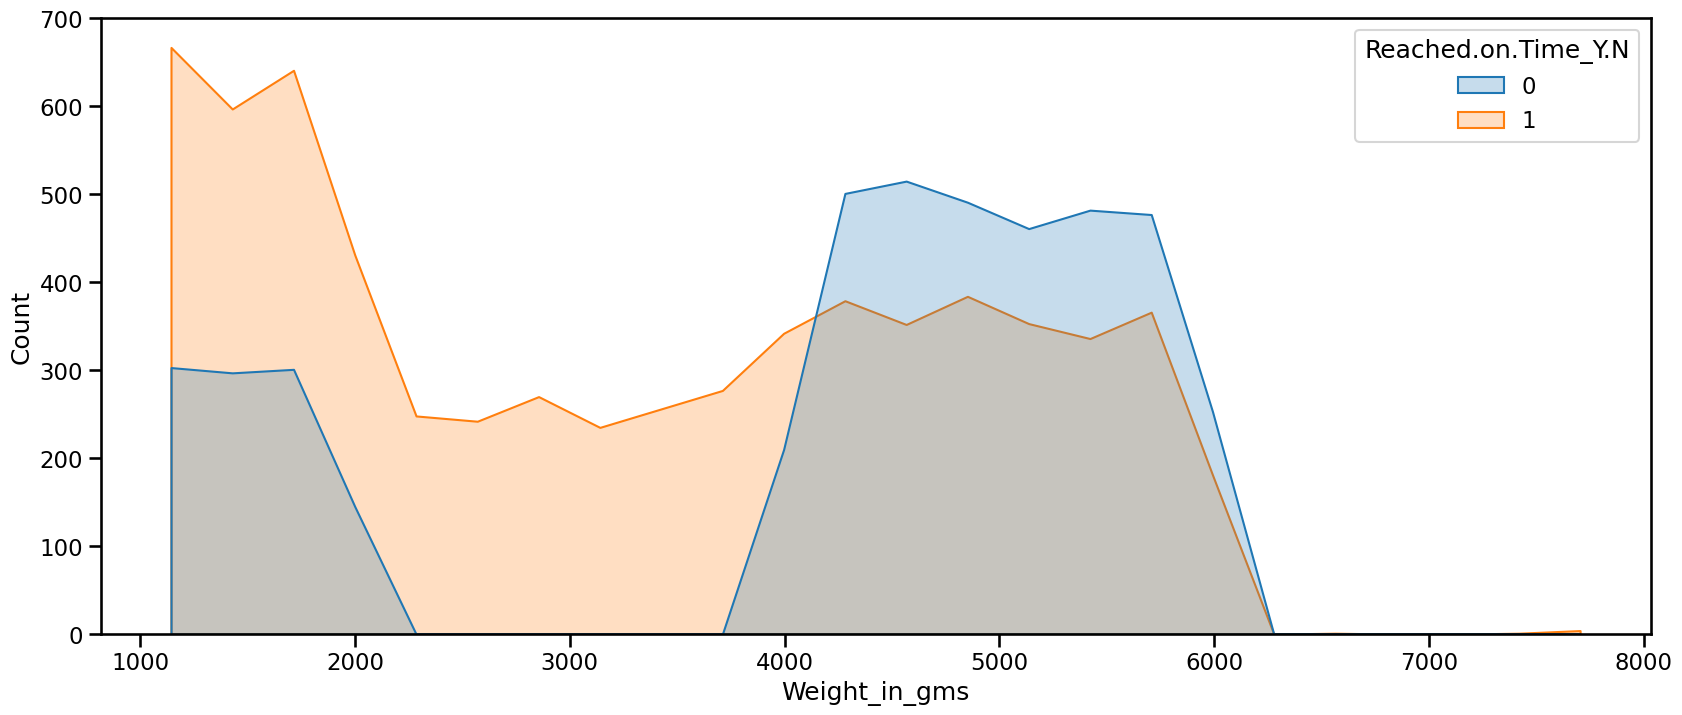

In [115]:
#At what range of product_weight reaches delivery on time?
plt.figure(figsize=(20,8))
sns.histplot(data=df2,x="Weight_in_gms",hue="Reached.on.Time_Y.N",element='poly')

In [116]:
#How many items are delivered on time based on product_importance
Product_importance = df2.groupby(["Product_importance"])["Reached.on.Time_Y.N"].value_counts().to_frame() 
Product_importance.columns = ["Count"] 
Product_importance = Product_importance.reset_index(level=[0,1]) 
Product_importance["Reached.on.Time_Y.N"] = ["Reached","Not Reached","Reached","Not Reached","Reached","Not Reached"] 
px.sunburst(Product_importance,path=["Product_importance","Reached.on.Time_Y.N"],values="Count")


In [117]:
#which type of shipment getting more contributed by male/female?
gender = df2.groupby(["Mode_of_Shipment"])["Gender"].value_counts().to_frame() 
gender.columns = ["Values"] 
#gender["Values"] = ["Male","Female","Male","Female","Male","Female"] 
gender = gender.reset_index(level=[0,1]) 
gender["Gender"] = ["Male","Female","Female","Male","Female","Male"] 
fig = px.sunburst(gender,path=["Mode_of_Shipment","Gender"],values="Values",color_discrete_sequence=px.colors.sequential.Blackbody)  
fig.show()

In [118]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import warnings
warnings.filterwarnings(action='ignore')

In [119]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [120]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    # Binary encoding
    df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
    
    # One-hot encoding
    for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['Reached.on.Time_Y.N']
    X = df.drop('Reached.on.Time_Y.N', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test


In [121]:
X_train, X_test, y_train, y_test = preprocess_inputs(df2)

In [122]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
 
}

In [123]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [124]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 63.55%
                   K-Nearest Neighbors: 63.67%
                         Decision Tree: 64.58%
                        Neural Network: 65.48%
                         Random Forest: 64.70%
                     Gradient Boosting: 68.03%
